# Which Megaline plan is better?
The commercial department, for the telecom operator, Megaline, wants to know which of the plans brings in more revenue, in order to adjust their advertising budget. The company offers its clients two prepaid plans:

- Surf 
- Ultimate


## I will analyze the data, based on 500 Megaline clients, for the year of 2018, and seek to find:
- which prepaid plan brings in more revenue
- number of calls made
- minutes used per month
- number of text messages sent per month
- volume of data per month
- monthly revenue from each user

### I also want to use hypthesis testing to find out:
- how the average revenue from the two plans differ
- how the revenue from users in these regions differ from other regions:
  - New York
  - New Jersey


### I will also create visual graphs to plot the distribution of data.

<h2 style="color: red;">Initialization.</h2>

In [3013]:
# Load in libraries
import pandas as pd
from IPython.display import HTML, display
import numpy as np
import calendar
from matplotlib import pyplot as plt
import seaborn as sns

In [3014]:
#Create a function to save time when displaying comments
def show_html_output(text):
    display(HTML(f"<div style='color: hotpink;'><b>{text}</b></div>"))

In [3015]:
# Call the new HTML function :
show_html_output(f"Load in the 5 data sets:")

In [3016]:
# Load in Plans data set
plans = pd.read_csv('megaline_plans.csv')
display(plans.head(3))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [3017]:
# Load in Users data set
users = pd.read_csv('megaline_users.csv')
display(users.head(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN


In [3018]:
show_html_output(f"The city column in the users dataframe, is a mess. This will need to be cleaned up.")

In [3019]:
# Load in Calls data set
calls = pd.read_csv('megaline_calls.csv')
display(calls.head(3))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


In [3020]:
# Load in Messages data set
messages = pd.read_csv('megaline_messages.csv')
display(messages.head(3))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


In [3021]:
# Load in Internet data set
internet = pd.read_csv('megaline_internet.csv')
display(internet.head(3))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


<div class="alert alert-info"><font color='hotpink'>
<b>Reading in the data sets:</b>
<br>
- I read in each data set.
<br>
- I displayed each dataframe to make sure that the files were not separated by semicolons (;). They were not, so I did not have to use sep=";"
<br>
</div></font color>

<h2 style="color: red;">Prepare the data</h2>

## <span style="color: hotpink;">Plans dataframe</span>

### Inspect the data

In [3026]:
display(plans.head(5))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [3027]:
plans.shape

(2, 8)

In [3028]:
show_html_output(f"There are only 2 rows. This dataframe is a description of the two different plans. ")

In [3029]:
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [3030]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [3031]:
# The datatypes look good. There is no missing data.

In [3032]:
# some of the column names to be shorter names, so that the dataframe is not so wide.

In [3033]:
#plan_name needs to be renamed to match users dataframe

In [3034]:
# Need to change mb_per_month_included to gb_per_month_included. Then change datatype to float.

### Clean the Plans dataframe

In [3036]:
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(float)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


In [3037]:
show_html_output(f"There are no missing rows in the Plans dataframe.")

In [3038]:
show_html_output(f"Convert megabytes to gigabytes.")

In [3039]:
plans['mb_per_month_included'] = plans['mb_per_month_included']  * .001

In [3040]:
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.36,500,20,10,0.03,0.03,surf
1,1000,30.72,3000,70,7,0.01,0.01,ultimate


In [3041]:
# Rename mb_per_month_included
plans = plans.rename(columns={'mb_per_month_included': 'gb_included'})

In [3042]:
# Rename minutes_included
plans = plans.rename(columns={'minutes_included': 'min_included'})

In [3043]:
# Rename the column 'messages_included'
plans = plans.rename(columns={'messages_included': 'msg_included'})

In [3044]:
# Rename the usd_monthly_pay column
plans = plans.rename(columns={'usd_monthly_pay': 'monthly_fee'})

In [3045]:
# Rename the usd_per_gb
plans = plans.rename(columns={'usd_per_gb': 'fee_per_gb'})

In [3046]:
# Rename the usd_per_message
plans = plans.rename(columns={'usd_per_message': 'fee_per_msg'})

In [3047]:
# Rename the usd_per_minute
plans = plans.rename(columns={'usd_per_minute': 'fee_per_min'})

In [3048]:
# Rename plan_name column
plans = plans.rename(columns={'plan_name': 'plan'})

In [3049]:
display(plans)

,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min,plan
0,50,15.36,500,20,10,0.03,0.03,surf
1,1000,30.72,3000,70,7,0.01,0.01,ultimate


In [3050]:
# I will round down the gb_included column

In [3051]:
# Round down
plans['gb_included'] = np.floor(plans['gb_included'])
display(plans)

,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [3052]:
# change gb_included datatype

In [3053]:
plans['gb_included'] = plans['gb_included'].astype(int)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   msg_included  2 non-null      int64  
 1   gb_included   2 non-null      int64  
 2   min_included  2 non-null      int64  
 3   monthly_fee   2 non-null      int64  
 4   fee_per_gb    2 non-null      int64  
 5   fee_per_msg   2 non-null      float64
 6   fee_per_min   2 non-null      float64
 7   plan          2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [3054]:
display(plans)

,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Plans dataframe:</b>
<br>
- I displayed the dataframe. It was only 2 rows long. It explained the two Megaline plan options.
<br>
- I used .info() to see the datatypes. Since the mb_per_month_included column was listed in megabytes, but the plan charges extra per gigabyte, I changed the type of this column to float, and multiplied it by .001 to convert to gigabytes.
<br>
- I renamed most of the column names, so that they would be shorter, and the dataframe would be easier to read.
<br>
- plan_name was renamed to plan, to match the users dataframe.
<br>
- I used np.floor to round down the gb_included column because the Megaline surf plan states that there are 15 GB included per month, and ultimate plan has 30.
<br>
 - I changed the datatype, of gb_included, to be int. Since the GB included, per month, are 15 and 30, and that will not change, there was no point in have the decimals.   
</font color></div>

## <span style="color: hotpink;">Users dataframe</span>

### Inspect the data

In [3058]:
display(users.head(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [3059]:
users.shape

(500, 8)

In [3060]:
#There are 500 rows, and 8 columns in the Users dataframe.

In [3061]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [3062]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3063]:
churn_total_rows = 500
churn_rows_w_data = 34
rows_with_missing_churn_data = churn_total_rows - churn_rows_w_data
missing_churn_data_percentage = (rows_with_missing_churn_data / churn_total_rows) * 100
show_html_output(f"churn_date is the only column with missing data. {missing_churn_data_percentage:.2f}% of the data is missing from this column.")

In [3064]:
# user_id needs to change to object
# reg_date needs to change to datetime type
# churn_date also needs to change to datetime type

### Clean the Users dataframe

In [3066]:
#Change user_id to type object.
users['user_id'] = users['user_id'].astype(object)

In [3067]:
# Change the reg_date column to month first
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['reg_date'] = users['reg_date'].dt.strftime('%m-%d-%y')
display(users.head(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12-24-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",08-13-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",10-21-18,surf,NaN


In [3068]:
#What should I do about the NaN in the churn_date column?

In [3069]:
#Convert 'churn_date' column to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
users['churn_date'] = users['churn_date'].dt.strftime('%m-%d-%y')
display(users.head(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12-24-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",08-13-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",10-21-18,surf,NaN


In [3070]:
users.dtypes

user_id       object
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [3071]:
users.describe()

,age
count,500.000000
mean,45.486000
std,16.972269
min,18.000000
25%,30.000000
50%,46.000000
75%,61.000000
max,75.000000


In [3072]:
# Print a sample of a fixed number of rows 
print("Sample of 10 rows:")
display(users.sample(10))

Sample of 10 rows:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",03-06-18,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",03-06-18,ultimate,NaN
386,1386,Jeni,Gilbert,30,"Seattle-Tacoma-Bellevue, WA MSA",04-11-18,surf,NaN
170,1170,Olin,Adkins,18,"Pittsburgh, PA MSA",09-25-18,surf,NaN
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",12-23-18,surf,12-30-18
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",04-16-18,surf,NaN
158,1158,Robin,Thornton,20,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",11-30-18,ultimate,NaN
18,1018,Dennis,Grimes,70,"Indianapolis-Carmel-Anderson, IN MSA",10-17-18,surf,NaN
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",12-13-18,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",01-28-18,surf,NaN


In [3073]:
show_html_output(f"There's a lot of cleaning to do in the city column.")

In [3074]:
#Need to remove 'MSA' from the city column.
users['city'] = users['city'].str.replace(' MSA', '', regex=False).str.strip()

In [3075]:
display(users.head(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",12-24-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",08-13-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",10-21-18,surf,NaN


In [3076]:
#Need to remove the State from the city column
users['city'] = users['city'].str.split(',', expand=True)[0]

In [3077]:
display(users.head(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,12-24-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,08-13-18,surf,NaN
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,10-21-18,surf,NaN


In [3078]:
#Need to remove the larger city-centers from the city column
users['city'] = users['city'].str.split('-').str[-1].str.strip()

In [3079]:
display(users.sample(3))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
286,1286,Casie,Castaneda,52,Milford,12-07-18,surf,NaN
155,1155,Claude,Hahn,19,West Palm Beach,02-21-18,ultimate,NaN
93,1093,Karima,Hampton,69,Davidson–Murfreesboro–Franklin,12-17-18,surf,NaN


In [3080]:
#city column looks good now.

<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Users dataframe:</b>
<br>
- There are 500 rows in the dataframe, and churn_date is the only column with missing data. But, 93.2% of that row has missing data.
<br>
- The naming of the columns look good.
<br>
- I changed the user_id column to object type, because I will not be doing math on that column.
<br>
- I used to_datetime and dt.strftime on the reg_date column, to change the date so that it prints out as mm-dd-yy.
<br>
- I also used to_datetime and dt.strftime on the churn_date column, and used errors='coerce' because the column was mostly full of Nan.
<br>
- I used describe to get the average age of users. The avg age is 45.5 years old.
<br>
- I used str.replace and str.strip to remove the unecessary 'MSA' in the city name column.
<br>
- I used str.split to get rid of the State that was unecessarily in the city column.
<br>
- I used str.split to get rid of the extra city names that were inside the city column, using -1, to grab only the city that was listed last. The city listed last would represent the actual city that the user lives in, and not the bigger metropolitan area.
<br>
- I used sample, to grab a random sampling of the data, and ran that a few times over, to make sure that the city column is now looking good.
</div></font color>

## <span style="color: hotpink;">Calls dataframe</span>

### Inspect the data

In [3084]:
display(calls.head(5))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3085]:
calls.shape

(137735, 4)

In [3086]:
#There are 137,735 rows and 4 columns in the calls dataframe.

In [3087]:
calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [3088]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [3089]:
show_html_output(f"There are no missing rows in the Calls dataframe.")

In [3090]:
# There is no missing data in the Calls dataframe.
# call_date will need to change to type datetime
# duration will have to be rounded up, to the nearest whole number
# user_id will need to change to object data type.
# id column name will need to change to call_id

### Clean the Calls dataframe

In [3092]:
# Change the call_date column to month first
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_date'] = calls['call_date'].dt.strftime('%m-%d-%y')
display(calls.tail(8))

,id,user_id,call_date,duration
137727,1499_196,1499,11-22-18,0.27
137728,1499_197,1499,12-27-18,8.36
137729,1499_198,1499,10-26-18,6.41
137730,1499_199,1499,11-21-18,8.72
137731,1499_200,1499,10-20-18,10.89
137732,1499_201,1499,09-21-18,8.12
137733,1499_202,1499,10-10-18,0.37
137734,1499_203,1499,12-29-18,13.86


In [3093]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [3094]:
# Round up 
calls['duration'] = np.ceil(calls['duration'])

In [3095]:
#Change datatype of duration to int
calls['duration'] = calls['duration'].astype(int)

In [3096]:
# check that the duration column was changed to type int
print(calls.head(5))

         id  user_id call_date  duration
0   1000_93     1000  12-27-18         9
1  1000_145     1000  12-27-18        14
2  1000_247     1000  12-27-18        15
3  1000_309     1000  12-28-18         6
4  1000_380     1000  12-30-18         5


In [3097]:
calls['user_id'] = calls['user_id'].astype(object)

In [3098]:
calls.dtypes

id           object
user_id      object
call_date    object
duration      int64
dtype: object

In [3099]:
calls.describe()

,duration
count,137735.000000
mean,7.146673
std,5.953919
min,0.000000
25%,2.000000
50%,6.000000
75%,11.000000
max,38.000000


In [3100]:
# Rename the id column
calls = calls.rename(columns={'id': 'call_id'})
display(calls.tail(8))

,call_id,user_id,call_date,duration
137727,1499_196,1499,11-22-18,1
137728,1499_197,1499,12-27-18,9
137729,1499_198,1499,10-26-18,7
137730,1499_199,1499,11-21-18,9
137731,1499_200,1499,10-20-18,11
137732,1499_201,1499,09-21-18,9
137733,1499_202,1499,10-10-18,1
137734,1499_203,1499,12-29-18,14


In [3101]:
# Print a sample of a fixed number of rows 
print("Sample of 10 rows:")
print(calls.sample(10))

Sample of 10 rows:
         call_id user_id call_date  duration
63762   1231_476    1231  11-19-18         1
120474   1420_44    1420  09-06-18        16
18636   1071_486    1071  06-18-18         0
13565   1057_444    1057  10-28-18         9
98738    1354_70    1354  12-15-18         7
85868   1316_113    1316  11-29-18        12
22728   1082_857    1082  10-29-18         4
123221  1434_571    1434  04-17-18        15
60295   1217_116    1217  11-15-18        19
136770  1495_220    1495  12-06-18         4


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Calls dataframe:</b>
<br>
- There are 137,735 rows in the dataframe, and there is no missing data.
<br>
- I renamed the id column to be call_id, to distinguish it from the id columns in the messages and internet dataframes.
<br>
- I changed the call_date column to date time, using the to_datetime function.
<br>
- I used dt.strftime to change the order of the output, so that it prints as mm-dd-yy, to match the reg_date column of the users database.
<br>
- I used np.ceil function to round up the duration column to the nearest whole number, to match the phone company's rules of their plans.
<br>
- I added import numpy up above, at the top of the project, to accomodate the np.ceil function.
<br>
- I changed the data type of the duration column to int, because all that data has already been rounded up, and also, the phone plans require whole numbers for duration of call.
<br>
- I changed the data type of user_id to object. I am not planning on doing math on this column, as that would make no sense. 
<br>
- I used describe to get the average duration of phone calls. The avg is 7 minutes.
<br>
- I printed out a sample of the Calls dataframe, to make sure that everything looks fine.
</div></font color>

## <span style="color: hotpink;">Messages dataframe</span>

### Inspect the data

In [3105]:
display(messages.head(5))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [3106]:
messages.shape

(76051, 3)

In [3107]:
messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

In [3108]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [3109]:
show_html_output(f"There are no missing rows in the Messages dataframe.")

In [3110]:
# There is no missing data.
# message_date will have to change to date time type.
# Need to change name of message_date to a shorter name
# Need to change name of 'id' column.

In [3111]:
print(messages.sample(10))

             id  user_id message_date
18361  1120_135     1120   2018-04-18
17059  1113_132     1113   2018-10-04
4226   1043_328     1043   2018-07-12
51928  1335_519     1335   2018-12-19
40802  1261_471     1261   2018-12-24
40784  1261_453     1261   2018-04-04
74516   1478_44     1478   2018-12-29
7152    1059_22     1059   2018-05-03
3472   1036_307     1036   2018-12-02
32547  1203_192     1203   2018-11-19


### Clean the Messages dataframe

In [3113]:
messages['user_id'] = messages['user_id'].astype(object)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  object
 2   message_date  76051 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [3114]:
# Change the call_date column to month first
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_date'] = messages['message_date'].dt.strftime('%m-%d-%y')

In [3115]:
# Rename the message_date column
messages = messages.rename(columns={'message_date': 'msg_date'})

In [3116]:
# Rename the id column
messages = messages.rename(columns={'id': 'msg_id'})
display(messages.tail(10))

,msg_id,user_id,msg_date
76041,1497_502,1497,12-30-18
76042,1497_503,1497,12-29-18
76043,1497_507,1497,12-23-18
76044,1497_517,1497,12-17-18
76045,1497_524,1497,12-12-18
76046,1497_526,1497,12-24-18
76047,1497_536,1497,12-24-18
76048,1497_547,1497,12-31-18
76049,1497_558,1497,12-24-18
76050,1497_613,1497,12-23-18


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Messages dataframe:</b>
<br>
- I used .info() to find that there are 76051 rows in the dataframe, and there is no missing data.
<br>
- I changed the message_date column to date time, using the to_datetime function, and dt.strftime, so that it matches the date format of the other dataframes.
<br>
- I changed the message_date column to a shorter name.
<br>
- I changed the data type of the user_id column to object, because there is no need to do math on this column.
<br>
- I changed the name of the 'id' column to 'msg_id' to make it more descriptive, and to distinguish it from user_id.
</div></font color>

## <span style="color: hotpink;">Internet dataframe</span>

### Inspect the data

In [3120]:
display(internet.head(5))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [3121]:
# id column needs to be renamed to 'int_id'.
# mb_used needs to be renamed to gb_used

In [3122]:
internet.shape

(104825, 4)

In [3123]:
# There are 104,825 columns, and 4 rows.

In [3124]:
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [3125]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [3126]:
# There are no missing rows.
# user_id datatype should be changed to object
# session_date needs to change to type date time

In [3127]:
#mb_used needs to be converted from megabytes to gigabytes.

### Clean the Internet dataframe

In [3129]:
# double check for missing values in the Internet dataframe
missing_internet_rows = internet.isna().sum()
print(missing_internet_rows)

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [3130]:
show_html_output(f"There are no missing rows in the Internet dataframe.")

In [3131]:
# Rename the id column
internet = internet.rename(columns={'id': 'int_id'})

In [3132]:
# Rename the mb_used column
internet = internet.rename(columns={'mb_used': 'gb_used'})

In [3133]:
#Change data type of user_id to object
internet['user_id'] = internet['user_id'].astype(object)

In [3134]:
# Change session_date to type date time.
# Change the session_date column to month first
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_date'] = internet['session_date'].dt.strftime('%m-%d-%y')

In [3135]:
show_html_output(f"Convert megabytes to gigabytes.")

In [3136]:
internet['gb_used'] = internet['gb_used']  * .001

In [3137]:
# Print a sample of data for the internet traffic
print(internet.sample(3))

         int_id user_id session_date  gb_used
98585   1466_66    1466     08-23-18  0.25750
16432  1073_371    1073     11-01-18  0.15360
98402  1465_320    1465     11-08-18  0.09503


In [3138]:
print(internet.sample(10))

         int_id user_id session_date  gb_used
75258  1354_123    1354     09-04-18  0.89558
33681  1153_183    1153     07-14-18  0.19330
74720   1352_96    1352     12-05-18  0.23771
76376   1359_53    1359     10-23-18  0.74837
82768   1386_83    1386     12-30-18  0.08480
6769    1039_44    1039     12-22-18  0.21657
53841  1243_143    1243     11-20-18  0.17489
14925   1068_41    1068     06-10-18  0.39645
19163  1085_237    1085     10-03-18  0.46433
41829    1187_6    1187     11-23-18  0.00000


<div class="alert alert-info"><font color='hotpink'>
<b>Cleaning the Internet dataframe:</b>
<br>
- I renamed the id column to int_id to distinguish it from id columns in the calls, and messages dataframes.
<br>
- I renamed the mb_used column, to gb_used, because Megaline charges customers per GB, not per MB.
<br>
- I multiplied all items in the gb_used column, by .001, to convert the data from megabytes to gigabytes, because Megaline charges per gigabyte. 
<br>
- I changed use_id to type object, because I will not need to do math on this column.
<br>
- I used to_datetime and dt.strftime to change the output of the session_date column to print month first, to match the format of the other date columns in the other dataframes.
</font color></div>

<h2 style="color: red;">Study plan conditions</h2>

In [3141]:
show_html_output(f"These are the conditions of the two plans:")

<div class="alert alert-info"><font color='hotpink'>
<b>Surf plan:</b>
<br>
- \$20 base charge per month.
<br>
- 50 text messages are included per month. Go over that, and you pay 3 cents per extra message.
<br>
- 15.3 GB included per month. Go over that, and you pay $10 per extra GB.
<br>
- 500 call minutes included per month. Go over that, and you pay 3 cents per extra minute. 
</font color></div>

<div class="alert alert-info"><font color='hotpink'>
<b>Ultimate plan:</b>
<br>
- \$70 base charge per month.
<br>
- 1000 text messages are included per month. Go over that, and you pay 1 cent per extra message.
<br>
- 30.7 GB included per month. Go over that, and you pay $7 per extra GB.
<br>
- 3000 call minutes included per month. Go over that, and you pay 1 cent per extra minute. 
</font color></div>

<div class="alert alert-info"><font color='hotpink'>
<b>Megaline rounds up</b>
<br>
- Phone calls - seconds are rounded up, to whole minutes, for each call (if a phone call lasted one second, it will be rounded up, to one minute.)
<br>
- Internet sessions - megabytes are rounded up, to gigabytes, for the month (they are not rounded up per session.) 
</font color></div>

<h2 style="color: red;">Aggregate data per user</h2>

In [3146]:
# Calls dataframe holds user_id
# Users dataframe holds user_id and also plan
# Messages dataframe holds user_id
# Internet dataframe holds user_id
# Plans dataframe holds plan

In [3147]:
show_html_output(f"I am unable to merge all 5 dataframes. The kernal keeps dying.")

In [3148]:
# Downcast numeric columns to save memory
#calls['user_id'] = pd.to_numeric(calls['user_id'], downcast='integer')
#users['user_id'] = pd.to_numeric(users['user_id'], downcast='integer')
#messages['user_id'] = pd.to_numeric(messages['user_id'], downcast='integer')
#internet['user_id'] = pd.to_numeric(internet['user_id'], downcast='integer')

<div class="alert alert-info"><font color='hotpink'>
<b>Find the answers to these questions: </b>
<br>
- What is the number of calls made by each user, per month?
<br>
- What is the amount of minutes spent by each user, per month?
<br>
- What is the number of messages sent by each user, per month?
<br>
- What is the volume of internet traffic used by each user, per month ?
</font color></div>

In [3150]:
# Convert 'call_date' column to datetime format 
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%m-%d-%y')
print(calls.head(3))

    call_id user_id  call_date  duration
0   1000_93    1000 2018-12-27         9
1  1000_145    1000 2018-12-27        14
2  1000_247    1000 2018-12-27        15


In [3151]:
# Calculate the number of calls made by each user per month.
# Extract month and year
calls['month'] = calls['call_date'].dt.month
print(calls.head(3))

    call_id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27         9     12
1  1000_145    1000 2018-12-27        14     12
2  1000_247    1000 2018-12-27        15     12


In [3152]:
show_html_output(f"Total number of calls, per user, by month:")

In [3153]:
# Group by 'user_id' and 'month_year', to count calls
calls_per_user_monthly = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
print(calls_per_user_monthly.head(10))

   user_id  month  call_count
0     1000     12          16
1     1001      8          27
2     1001      9          49
3     1001     10          65
4     1001     11          64
5     1001     12          56
6     1002     10          11
7     1002     11          55
8     1002     12          47
9     1003     12         149


In [3154]:
show_html_output(f"Total duration of minutes, per user, by month:")

In [3155]:
# Group by 'user_id' and 'month' to get the total duration
min_per_user_monthly = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(min_per_user_monthly.head(10))

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
5,1001,12,412
6,1002,10,59
7,1002,11,386
8,1002,12,384
9,1003,12,1104


In [3156]:
show_html_output(f"Total number of text messages, per user, by month:")

In [3157]:
# Convert 'msg_date' column to datetime format
messages['msg_date'] = pd.to_datetime(messages['msg_date'], format='%m-%d-%y')
# Extract month and year
messages['month'] = messages['msg_date'].dt.month

In [3158]:
# Group by 'user_id' and 'month', count messages
msg_per_user_monthly = messages.groupby(['user_id', 'month']).size().reset_index(name='Total_messages')
display(msg_per_user_monthly.head(10))

,user_id,month,Total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [3159]:
show_html_output(f"Volume of internet traffic:")

In [3160]:
# Convert 'session_date' column to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%m-%d-%y')

In [3161]:
# Extract month, and make new column in the internet dataframe
internet['month'] = internet['session_date'].dt.month

In [3162]:
# Group by 'user_id' and 'month', and sum gb_used
gb_total = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
display(gb_total.head(10))

,user_id,month,gb_used
0,1000,12,1.90147
1,1001,8,6.91915
2,1001,9,13.31482
3,1001,10,22.33049
4,1001,11,18.50430
5,1001,12,19.36918
6,1002,10,6.55201
7,1002,11,19.34508
8,1002,12,14.39624
9,1003,12,27.04414


In [3163]:
show_html_output(f"Merge these dataframes:")

In [3164]:
# calls_per_user_monthly holds user_id, month, call_count
# min_per_user_monthly holds user_id, month, duration
# msg_per_user_monthly holds user_id, month, messages
# gb_total holds user_id, month, gb_used

In [3165]:
# Merge calls_per_user_monthly with min_per_user_monthly
merged_df = pd.merge(calls_per_user_monthly, min_per_user_monthly, on=['user_id', 'month'], how='inner')

In [3166]:
# Merge the result with msg_per_user_monthly
merged_df = pd.merge(merged_df, msg_per_user_monthly, on=['user_id', 'month'], how='inner')

In [3167]:
# Merge the final result with gb_total
merged_df = pd.merge(merged_df, gb_total, on=['user_id', 'month'], how='inner')

In [3168]:
# Display the result of all 4 dataframes merged
display(merged_df)

,user_id,month,call_count,duration,Total_messages,gb_used
0,1000,12,16,124,11,1.90147
1,1001,8,27,182,30,6.91915
2,1001,9,49,315,44,13.31482
3,1001,10,65,393,53,22.33049
4,1001,11,64,426,36,18.50430
...,...,...,...,...,...,...
1754,1496,9,52,414,21,16.38927
1755,1496,10,46,317,18,14.28736
1756,1496,11,39,308,13,8.54736
1757,1496,12,40,294,11,16.43899


In [3169]:
# Merge the final merged_df with the 'plan' column from the plans dataframe
merged_users = pd.merge(merged_df, users[['user_id', 'plan']], on='user_id', how='inner')
display(merged_users.tail(3))

,user_id,month,call_count,duration,Total_messages,gb_used,plan
1756,1496,11,39,308,13,8.54736,surf
1757,1496,12,40,294,11,16.43899,surf
1758,1497,12,54,300,50,11.10655,ultimate


In [3170]:
# Merge the final merged_df with the entire plans DataFrame
merged_revenue = pd.merge(merged_users, plans, on='plan', how='inner')
#display(merged_revenue.sample(15))
display(merged_revenue.tail(8))

,user_id,month,call_count,duration,Total_messages,gb_used,plan,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min
1751,1494,10,78,616,38,14.49850,surf,50,15,500,20,10,0.03,0.03
1752,1494,11,82,509,35,18.40582,surf,50,15,500,20,10,0.03,0.03
1753,1494,12,72,431,33,15.30245,surf,50,15,500,20,10,0.03,0.03
1754,1496,8,18,122,2,8.60566,surf,50,15,500,20,10,0.03,0.03
1755,1496,9,52,414,21,16.38927,surf,50,15,500,20,10,0.03,0.03
1756,1496,10,46,317,18,14.28736,surf,50,15,500,20,10,0.03,0.03
1757,1496,11,39,308,13,8.54736,surf,50,15,500,20,10,0.03,0.03
1758,1496,12,40,294,11,16.43899,surf,50,15,500,20,10,0.03,0.03


In [3171]:
show_html_output(f"Need to round up the gb_used column")

In [3172]:
# Megaline rounds up the internet gb_used at the end of each month.
merged_revenue['gb_used'] = np.ceil(merged_revenue['gb_used'])
display(merged_revenue.tail(8))

,user_id,month,call_count,duration,Total_messages,gb_used,plan,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min
1751,1494,10,78,616,38,15.0,surf,50,15,500,20,10,0.03,0.03
1752,1494,11,82,509,35,19.0,surf,50,15,500,20,10,0.03,0.03
1753,1494,12,72,431,33,16.0,surf,50,15,500,20,10,0.03,0.03
1754,1496,8,18,122,2,9.0,surf,50,15,500,20,10,0.03,0.03
1755,1496,9,52,414,21,17.0,surf,50,15,500,20,10,0.03,0.03
1756,1496,10,46,317,18,15.0,surf,50,15,500,20,10,0.03,0.03
1757,1496,11,39,308,13,9.0,surf,50,15,500,20,10,0.03,0.03
1758,1496,12,40,294,11,17.0,surf,50,15,500,20,10,0.03,0.03


In [3173]:
show_html_output(f"Create a function for monthly revenue for each user:")

In [3174]:
# Create a function that accepts the plan name
# Separate surf plan from ultimate plan
def calculate_revenue(row):
    if row['plan'] == 'surf':
        min = 0 if row['duration'] <= 500 else (row['duration'] - 500) * .03
        msg = 0 if row['Total_messages'] <= 50 else (row['Total_messages'] - 50) * .03
        gb = 0 if row['gb_used'] <= 15 else (row['gb_used'] - 15) * 10
        return 20 + min + msg + gb
    else:
        min = 0 if row['duration'] <= 3000 else (row['duration'] - 3000) * .01
        msg = 0 if row['Total_messages'] <= 1000 else (row['Total_messages'] - 1000) * .01
        gb = 0 if row['gb_used'] <= 30 else (row['gb_used'] - 30) * 7
        return 70 + min + msg + gb

In [3175]:
show_html_output(f"Call the function")

In [3176]:
# Apply the calculate_revenue function to each row in the merged dataframe, creating a new column
merged_revenue['total_revenue'] = merged_revenue.apply(calculate_revenue, axis=1)
display(merged_revenue.head(5))

,user_id,month,call_count,duration,Total_messages,gb_used,plan,msg_included,gb_included,min_included,monthly_fee,fee_per_gb,fee_per_msg,fee_per_min,total_revenue
0,1000,12,16,124,11,2.0,ultimate,1000,30,3000,70,7,0.01,0.01,70.0
1,1006,11,2,10,15,3.0,ultimate,1000,30,3000,70,7,0.01,0.01,70.0
2,1006,12,9,59,139,33.0,ultimate,1000,30,3000,70,7,0.01,0.01,91.0
3,1008,10,71,476,21,18.0,ultimate,1000,30,3000,70,7,0.01,0.01,70.0
4,1008,11,63,446,37,24.0,ultimate,1000,30,3000,70,7,0.01,0.01,70.0


In [3177]:
# Check for NaN values in the 'plan' column
nan_count = merged_revenue['plan'].isna().sum()
print(f"Number of NaN values in 'plan' column: {nan_count}")

Number of NaN values in 'plan' column: 0


In [3178]:
show_html_output(f"The new column, 'total_revenue', shows up on the far right, if you scroll over.")

In [3179]:
# Select only these columns user_id, month, total_revenue
filtered_revenue = merged_revenue[['user_id', 'month', 'total_revenue']]

# Sort by 'total_revenue' and 'user_id'
sorted_revenue = filtered_revenue.sort_values(by=['total_revenue', 'user_id'],ascending=False)

# Display the result
display(sorted_revenue.head(15))
#print(sorted_revenue.sample(5))

,user_id,month,total_revenue
1544,1379,12,600.37
1138,1240,8,387.85
1140,1240,10,320.82
1142,1240,12,308.57
1252,1272,12,294.14
1239,1267,12,282.55
1680,1447,11,280.54
1293,1293,10,273.51
1244,1268,7,260.63
1063,1201,11,260.00


<div class="alert alert-info"><font color='hotpink'>
<b>To aggregate data per user: </b>
<br>
<br>
- To find the number of calls made by each user, per month: 
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to extract the month from the call_date column, in the calls dataframe, then create a new column called month.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'user_id' and 'month', used the .size function, and created a new column called 'call_count' to hold the size.
<br>
<br>
- To find the total duration of minutes by each user, per month:
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped 'user_id' and 'month', in the calls dataframe, and summed the duration of minutes, to hold the sum.
<br>
<br>
- To find the number of messages sent by each user, per month:
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to create a new column, called 'month', in the messages dataframe.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'user_id' and 'month', and created a new column, 'Total_messages'  to store the count of messages for each group

<br>
<br>
- To get the volume of internet traffic used by each user, per month:
<br>&nbsp;&nbsp;&nbsp;&nbsp;I used dt.month to create a new column, called 'month', in the internet dataframe.
<br>
<br>
- To get the revenue per user, per month:
<br>&nbsp;&nbsp;&nbsp;&nbsp;I sorted the internet dataframe, by 'user_id' and 'month', and used .sum method on 'gb_used' to get the total of GB.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I merged 4 dataframes, so that all the data would be in one dataframe, and easier to query.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I rounded up the gb_used column, because Megaline rounds up the gb_used at the end of the month.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I created a function to calculate monthly revenue, based on which of the two plans the user was signed up for.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I called the function, using apply method, and axis=1, to send each row of the merged_revenue dataframe.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I then created a new dataframe, called filtered_dataframe, that only had these columns user_id, month, total_revenue , and printed that out.
<br>&nbsp;&nbsp;&nbsp;&nbsp;I sorted that filtered_dataframe, in descending order, sorting by total_revenue', and 'user_id' to print out the higest revenues at the top of the printout.
</font color></div>

 <h2 style="color: red;">Study user behavior</h2>

### <span style="color: hotpink;">Calls</span>

In [3183]:
show_html_output(f"Compare the average duration of calls, per each plan, per each month.")

In [3184]:
# Group by 'month' and 'plan', and calculate the average duration
calls_avg_duration = merged_revenue.groupby(['month', 'plan'])['duration'].mean().reset_index()
print(calls_avg_duration)

    month      plan    duration
0       1      surf  292.000000
1       1  ultimate  197.666667
2       2      surf  331.200000
3       2  ultimate  486.800000
4       3      surf  344.937500
5       3  ultimate  415.285714
6       4      surf  366.228571
7       4  ultimate  322.750000
8       5      surf  443.981132
9       5  ultimate  410.190476
10      6      surf  425.514286
11      6  ultimate  370.918919
12      7      surf  452.101124
13      7  ultimate  439.638298
14      8      surf  427.873950
15      8  ultimate  436.438596
16      9      surf  426.020408
17      9  ultimate  437.591549
18     10      surf  442.348066
19     10  ultimate  465.034091
20     11      surf  443.954128
21     11  ultimate  464.068627
22     12      surf  495.069106
23     12  ultimate  463.296000


In [3185]:
# Convert numeric month to abbreviated month name
calls_avg_duration['month_abbr'] = calls_avg_duration['month'].apply(lambda x: calendar.month_abbr[x])
calls_avg_duration = calls_avg_duration.sort_values(by='month')
display(calls_avg_duration)

,month,plan,duration,month_abbr
0,1,surf,292.000000,Jan
1,1,ultimate,197.666667,Jan
2,2,surf,331.200000,Feb
3,2,ultimate,486.800000,Feb
4,3,surf,344.937500,Mar
5,3,ultimate,415.285714,Mar
6,4,surf,366.228571,Apr
7,4,ultimate,322.750000,Apr
8,5,surf,443.981132,May
9,5,ultimate,410.190476,May


In [3186]:
show_html_output(f"Plot a bar plot to visualize it.")

In [3187]:
#Make month_abbr categorical
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
calls_avg_duration['month_abbr'] = pd.Categorical(calls_avg_duration['month_abbr'], categories=month_order, ordered=True)
calls_avg_duration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   month       24 non-null     int32   
 1   plan        24 non-null     object  
 2   duration    24 non-null     float64 
 3   month_abbr  24 non-null     category
dtypes: category(1), float64(1), int32(1), object(1)
memory usage: 1.1+ KB


In [3188]:
# Pivot the dataframe for easier plotting
pivot_df = calls_avg_duration.pivot(index='month_abbr', columns='plan', values='duration')
print(pivot_df)

plan              surf    ultimate
month_abbr                        
Jan         292.000000  197.666667
Feb         331.200000  486.800000
Mar         344.937500  415.285714
Apr         366.228571  322.750000
May         443.981132  410.190476
Jun         425.514286  370.918919
Jul         452.101124  439.638298
Aug         427.873950  436.438596
Sep         426.020408  437.591549
Oct         442.348066  465.034091
Nov         443.954128  464.068627
Dec         495.069106  463.296000


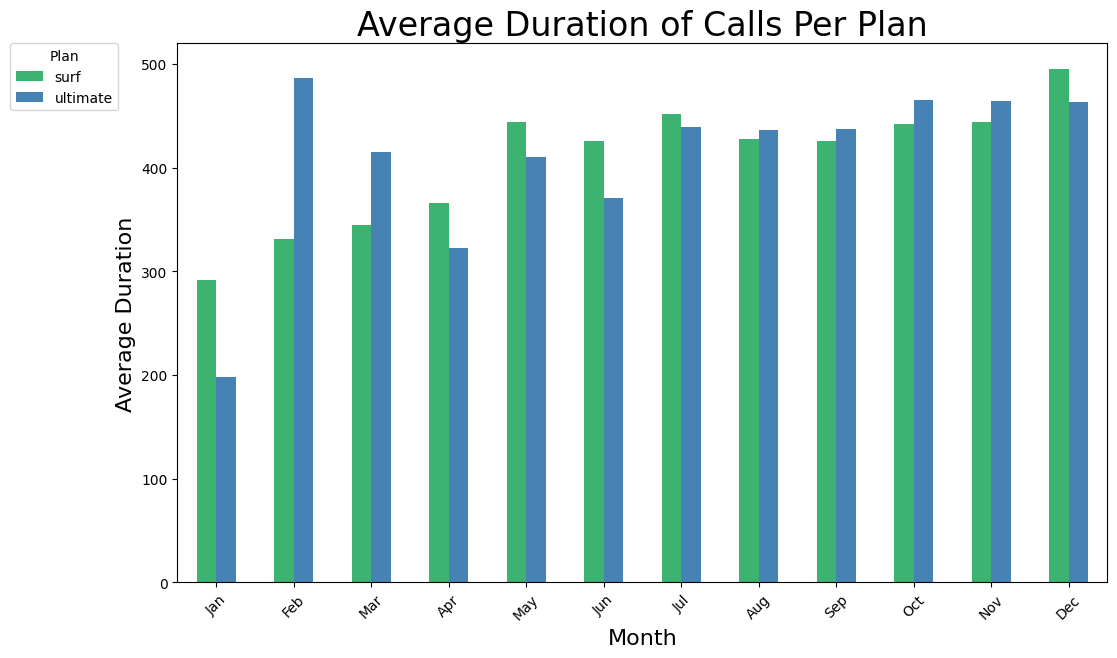

In [3189]:
# Plot graph
fig, ax = plt.subplots(figsize=(12, 7))

# Define a list of hex colors
colors = ['#3CB371','#4682B4']

ax = pivot_df.plot(kind='bar', ax=ax, color=colors)

plt.xlabel("Month", size=16)
plt.ylabel("Average Duration", size=16)
plt.title("Average Duration of Calls Per Plan", size = 24)

#Rotate the x labels
plt.xticks(rotation=45)

# Adjust legend to be just outside the upper left of the plot area
plt.legend(title='Plan', bbox_to_anchor=(-0.18, 1), loc='upper left', borderaxespad=0.)

#plt.tight_layout()
plt.show()

<div class="alert alert-info"><font color='hotpink'>
<b>To compare the average duration of calls, per each plan, per each month: </b>
<br>
- I grouped the merged_revenue dataframe, by 'month' and 'plan', and used the .mean method to get the average duration.
<br>
- I converted the number of month (1, 2, 3, etc) to abbreviated month names (Dec., Jan., Feb., etc), using the .calendar method, and created a new month_abbr column.
<br>
- I imported calendar, adding that up above, at the top of the project.
<br>
- I created a list of abbreviated month names in the correct chronological order, from January to December.
<br>
- I used the Categorical method to take that list to convert month_abbr to a categorical type. 
<br>
- I pivoted the calls_avg_duration dataframe to make it easier to plot on to a graph.
<br>
<br>
<b>To create the bar plot, to compare this data:: </b>
<br>
- I imported pyplot and added that to the top of the project, up above.
<br>
- I used figsize to make the graph a little larger, because the legend was displaying on top of some of the bars.
<br>
- I created some custom hex colors, then used those colors for the graph, using the 'color' parameter.
<br>
- I increased the size of the font for the labels and the title.
<br>
- I rotated the xlabels using xticks.
<br>
- I used legend to customize the legend, to make the legend title uppercase. I used bbox_to_anchor to make the legend appear on the left.
</font color></div>

In [3345]:
show_html_output(f"Compare the number of minutes, users of each plan require, each month.")

In [3347]:
# Groupby 'month', 'plan', 'user_id' and get total of minutes of calls.
calls_sum_duration = merged_revenue.groupby(['month', 'plan', 'user_id'])['duration'].sum().reset_index()
print(calls_sum_duration) 

      month      plan  user_id  duration
0         1      surf     1362       292
1         1  ultimate     1077       290
2         1  ultimate     1196       287
3         1  ultimate     1214        16
4         2      surf     1099        39
...     ...       ...      ...       ...
1754     12  ultimate     1477       289
1755     12  ultimate     1478       376
1756     12  ultimate     1482        56
1757     12  ultimate     1487       416
1758     12  ultimate     1497       300

[1759 rows x 4 columns]


In [3351]:
calls_sum_duration.columns


Index(['month', 'plan', 'user_id', 'duration'], dtype='object')

In [3367]:
# Convert numeric month to abbreviated month names
calls_sum_duration['month_abbr'] = calls_sum_duration['month'].apply(lambda x: pd.to_datetime(f'2023-{x:02d}-01').strftime('%b'))

In [3371]:
# Now group by 'month_abbr' and 'plan' to get the total duration per plan per month
month_plan_summary = calls_sum_duration.groupby(['month_abbr', 'plan'])['duration'].sum().reset_index(name='total_duration')
print(month_plan_summary.head(8))

  month_abbr      plan  total_duration
0        Apr      surf           12818
1        Apr  ultimate            5164
2        Aug      surf           50917
3        Aug  ultimate           24877
4        Dec      surf          121787
5        Dec  ultimate           57912
6        Feb      surf            1656
7        Feb  ultimate            2434


In [3359]:
# Make sure the 'month_abbr' column is treated as a categorical type with the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_plan_summary['month_abbr'] = pd.Categorical(month_plan_summary['month_abbr'], categories=month_order, ordered=True)

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


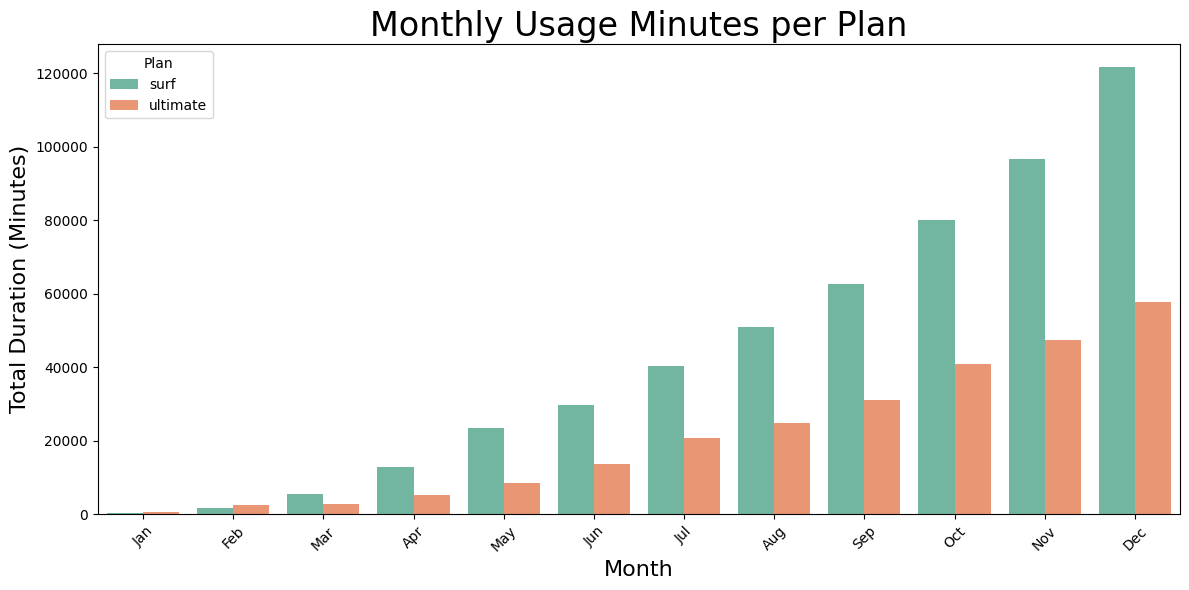

In [3363]:
# Plotting the grouped data
plt.figure(figsize=(12, 6))

sns.barplot(data=month_plan_summary, x='month_abbr', y='total_duration', hue='plan', palette='Set2')

# Set titles and labels
plt.title('Monthly Usage Minutes per Plan', size=24)
plt.xlabel('Month', size=16)
plt.ylabel('Total Duration (Minutes)', size=16)

plt.xticks(rotation=45)

# Adjust the legend position
plt.legend(title='Plan', loc='upper left')
plt.tight_layout()

plt.show()

<div class="alert alert-info"><font color='hotpink'>
<b>To compare the number of minutes, users of each plan require, each month.: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I created a dataframe with these columns ...'month', 'plan', 'user_id' and got a total of minutes of calls, using the .sum method.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used to_datetime method to converts this string to a datetime object so that date methods can be applied.
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I grouped by 'month_abbr' and 'plan' which got rid of the user_id column
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used Categorical method to make sure that the datatype for the 'month_abbr' column was category.
<br>
<br>
<b>To plot this on a bar graph: </b>
<br>
- &nbsp;&nbsp;&nbsp;&nbsp;I used figsize to create a larger graph.
<br>
- I plotted the months on the x axis.
<br>
- I used the 'hue' parameter to add color to the 'plan' data, to separate the surf plan from the ultimate plan.
<br>
- I used kde=False so that the extra line graph will not appear on top of the bar graph.
<br>
- I used the rotation parameter, of xticks, to rotate the labels for the x axis.
<br>
- 
</font color></div>

In [ ]:
[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [ ]:
# Calculate the mean and the variance of the monthly call duration

In [ ]:
# Plot a boxplot to visualize the distribution of the monthly call duration

In [ ]:
[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

In [ ]:
# Compare the number of messages users of each plan tend to send each month

In [ ]:
# Compare the amount of internet traffic consumed by users per plan

In [ ]:
[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [ ]:
[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

In [ ]:
[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

## Test statistical hypotheses

In [ ]:
[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

# Test the hypotheses

In [ ]:
[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [ ]:
# Test the hypotheses

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]